### Feature Engineering

**Creating** new `Features` or **Transforming** existing `Features` to get the most out of your Data.

Feature `Creation`

In [1]:
import pandas as pd

sms = pd.read_csv("../Data/SMSSpamCollection.tsv", 
                  sep='\t', 
                  header=None, names=['Label','SMS'])

sms.head()

,Label,SMS
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


Creating `Feature` for Text Message Length

Spam Messages are `longer` than Actual Message ( Excluding `White Spaces` )

In [2]:
sms['Length'] = sms['SMS'].apply(lambda x : len(x) - x.count(" "))
sms.head()

,Label,SMS,Length
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


Create Feature for % of Text that is Punctuation

Spam contains `more` Punctuation 

In [3]:
import string

def count_punctuation(text):
    count = sum([1 for char in text if char in string.punctuation]) # Count of Punctuations
    return round(count/(len(text) - text.count(" ")),3) * 100

sms['Punctuation%'] = sms['SMS'].apply(lambda x : count_punctuation(x))
                                       
sms.head()

,Label,SMS,Length,Punctuation%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


`Transformation`

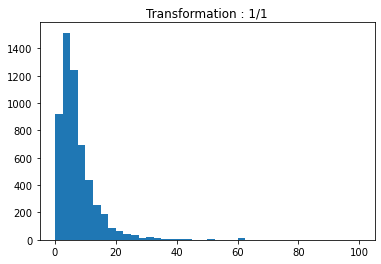

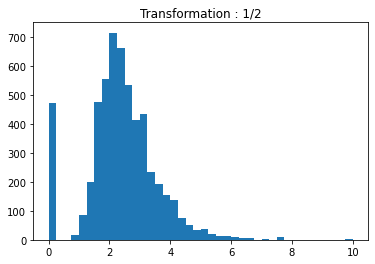

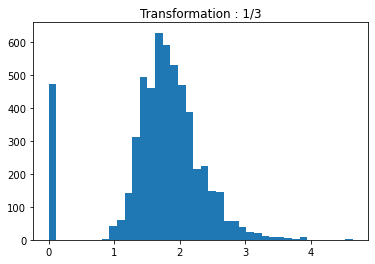

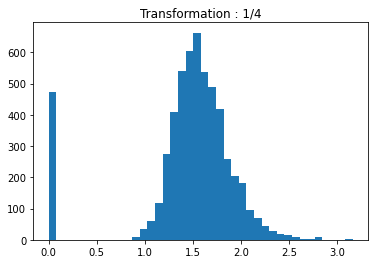

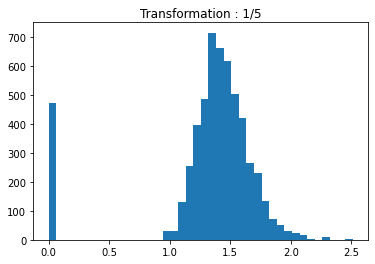

In [4]:
import matplotlib.pyplot as plt

for i in [1,2,3,4,5]:
    plt.hist(sms['Punctuation%']**(1/i), bins=40)
    plt.title(f'Transformation : 1/{str(i)}')
    plt.show()